In [97]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

from sklearn.compose import ColumnTransformer

from scipy import stats
import numpy as np

In [78]:
# Cargar el csv
file_path = 'cars.csv'
df = pd.read_csv(file_path, sep=';')
df.head()

,CODE,PRODUCTO,TIPO_CARROCERIA,COMBUSTIBLE,Potencia_,TRANS,FORMA_PAGO,ESTADO_CIVIL,GENERO,OcupaciOn,...,REV_Garantia,Averia_grave,QUEJA_CAC,EDAD_COCHE,COSTE_VENTA,km_anno,Mas_1_coche,Revisiones,Edad Cliente,Tiempo
0,CLI1,A,TIPO1,FUEL 1,Baja,M,Contado,CASADO,M,Empresa,...,NO DATA,Averia muy grave,SI,2.08,2892,0,0,2,18,0
1,CLI2,A,TIPO1,FUEL 1,Baja,M,Contado,CASADO,F,Empresa,...,SI,No,NO,2.45,1376,7187,0,2,53,0
2,CLI3,A,TIPO1,FUEL 1,Baja,M,Otros,CASADO,M,Empresa,...,NO DATA,No,NO,2.51,1376,0,1,4,21,3
3,CLI4,A,TIPO1,FUEL 1,Baja,M,Financiera Marca,CASADO,F,Empresa,...,SI,Averia muy grave,SI,2.43,2015,7256,1,4,48,5
4,CLI5,A,TIPO1,FUEL 1,Baja,M,Financiera Marca,CASADO,F,Funcionario,...,NO DATA,No,NO,2.30,1818,0,1,3,21,3


# Limpieza

In [79]:
# Identificar valores faltantes
missing_values = df.isnull().sum()
missing_values


CODE                   0
PRODUCTO               0
TIPO_CARROCERIA        0
COMBUSTIBLE            0
Potencia_              0
TRANS                  0
FORMA_PAGO             0
ESTADO_CIVIL         890
GENERO               860
OcupaciOn              0
PROVINCIA              0
Campanna1              0
Campanna2              0
Campanna3              0
Zona _Renta        13178
REV_Garantia           0
Averia_grave           1
QUEJA_CAC              0
EDAD_COCHE             0
COSTE_VENTA            0
km_anno                0
Mas_1_coche            0
Revisiones             0
Edad Cliente           0
Tiempo                 0
dtype: int64

In [80]:
# Porcentaje de valores faltantes
missing_percentage = df.isnull().mean() * 100
missing_percentage

CODE                0.000000
PRODUCTO            0.000000
TIPO_CARROCERIA     0.000000
COMBUSTIBLE         0.000000
Potencia_           0.000000
TRANS               0.000000
FORMA_PAGO          0.000000
ESTADO_CIVIL        1.533187
GENERO              1.481507
OcupaciOn           0.000000
PROVINCIA           0.000000
Campanna1           0.000000
Campanna2           0.000000
Campanna3           0.000000
Zona _Renta        22.701511
REV_Garantia        0.000000
Averia_grave        0.001723
QUEJA_CAC           0.000000
EDAD_COCHE          0.000000
COSTE_VENTA         0.000000
km_anno             0.000000
Mas_1_coche         0.000000
Revisiones          0.000000
Edad Cliente        0.000000
Tiempo              0.000000
dtype: float64

In [81]:
# Eliminar filas con valores faltantes
df.dropna(inplace=True)

In [82]:
# Identificar valores faltantes
missing_percentage = df.isnull().mean() * 100
missing_percentage


CODE               0.0
PRODUCTO           0.0
TIPO_CARROCERIA    0.0
COMBUSTIBLE        0.0
Potencia_          0.0
TRANS              0.0
FORMA_PAGO         0.0
ESTADO_CIVIL       0.0
GENERO             0.0
OcupaciOn          0.0
PROVINCIA          0.0
Campanna1          0.0
Campanna2          0.0
Campanna3          0.0
Zona _Renta        0.0
REV_Garantia       0.0
Averia_grave       0.0
QUEJA_CAC          0.0
EDAD_COCHE         0.0
COSTE_VENTA        0.0
km_anno            0.0
Mas_1_coche        0.0
Revisiones         0.0
Edad Cliente       0.0
Tiempo             0.0
dtype: float64

In [83]:
df.head()

,CODE,PRODUCTO,TIPO_CARROCERIA,COMBUSTIBLE,Potencia_,TRANS,FORMA_PAGO,ESTADO_CIVIL,GENERO,OcupaciOn,...,REV_Garantia,Averia_grave,QUEJA_CAC,EDAD_COCHE,COSTE_VENTA,km_anno,Mas_1_coche,Revisiones,Edad Cliente,Tiempo
0,CLI1,A,TIPO1,FUEL 1,Baja,M,Contado,CASADO,M,Empresa,...,NO DATA,Averia muy grave,SI,2.08,2892,0,0,2,18,0
1,CLI2,A,TIPO1,FUEL 1,Baja,M,Contado,CASADO,F,Empresa,...,SI,No,NO,2.45,1376,7187,0,2,53,0
2,CLI3,A,TIPO1,FUEL 1,Baja,M,Otros,CASADO,M,Empresa,...,NO DATA,No,NO,2.51,1376,0,1,4,21,3
3,CLI4,A,TIPO1,FUEL 1,Baja,M,Financiera Marca,CASADO,F,Empresa,...,SI,Averia muy grave,SI,2.43,2015,7256,1,4,48,5
4,CLI5,A,TIPO1,FUEL 1,Baja,M,Financiera Marca,CASADO,F,Funcionario,...,NO DATA,No,NO,2.30,1818,0,1,3,21,3


In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44119 entries, 0 to 58047
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CODE             44119 non-null  object 
 1   PRODUCTO         44119 non-null  object 
 2   TIPO_CARROCERIA  44119 non-null  object 
 3   COMBUSTIBLE      44119 non-null  object 
 4   Potencia_        44119 non-null  object 
 5   TRANS            44119 non-null  object 
 6   FORMA_PAGO       44119 non-null  object 
 7   ESTADO_CIVIL     44119 non-null  object 
 8   GENERO           44119 non-null  object 
 9   OcupaciOn        44119 non-null  object 
 10  PROVINCIA        44119 non-null  object 
 11  Campanna1        44119 non-null  object 
 12  Campanna2        44119 non-null  object 
 13  Campanna3        44119 non-null  object 
 14  Zona _Renta      44119 non-null  object 
 15  REV_Garantia     44119 non-null  object 
 16  Averia_grave     44119 non-null  object 
 17  QUEJA_CAC        

## Cosas importantes

Hemos notado que al ser nuestra variable objetivo el comprar mas de un coche (Mas_1_coche), que es importante fijarse en las variables que más relacionadas están con ella.

Despues de un estudio de un mapa de correlación hemos deliverado que las más relacionadas son el tiempo (0.93) y la zona de renta (0.44).

Lo suyo sería establecer una nueva variable que guarde esta relación, donde la zona de renta poderemos más en función de que zona de renta tiene, y que también pondere más cuanto más tiempo haya entre compras, porque así hay más probabilidad de que necesite un coche nuevo.

## Quiero ver si podemos sacar algun patrón de las campañas con la zona renta

In [86]:
# Crear el OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)  # Use sparse_output=False for a dense array

# Seleccionar la columna que deseas codificar
columna = df[['Zona _Renta']]  # Asegúrate de pasarla como DataFrame

# Aplicar el encoder a la columna
onehot = encoder.fit_transform(columna)


In [87]:
# Obtener los nombres de las nuevas columnas generadas
nombres_columnas = encoder.get_feature_names_out(['Zona _Renta'])

# Crear un DataFrame con los datos transformados
df_onehot = pd.DataFrame(onehot, columns=nombres_columnas)

# Concatenar el DataFrame original con el nuevo DataFrame de variables dummy
df = pd.concat([df, df_onehot], axis=1)

In [88]:
df.columns

Index(['CODE', 'PRODUCTO', 'TIPO_CARROCERIA', 'COMBUSTIBLE', 'Potencia_',
       'TRANS', 'FORMA_PAGO', 'ESTADO_CIVIL', 'GENERO', 'OcupaciOn',
       'PROVINCIA', 'Campanna1', 'Campanna2', 'Campanna3', 'Zona _Renta',
       'REV_Garantia', 'Averia_grave', 'QUEJA_CAC', 'EDAD_COCHE',
       'COSTE_VENTA', 'km_anno', 'Mas_1_coche', 'Revisiones', 'Edad Cliente',
       'Tiempo', 'Zona _Renta_Alto', 'Zona _Renta_Medio',
       'Zona _Renta_Medio-Bajo', 'Zona _Renta_Otros'],
      dtype='object')

In [89]:
df.drop('Zona _Renta', axis=1, inplace=True)

In [90]:
le = LabelEncoder()

for column in df.columns:
    if df[column].dtype == type(object):
        df[column] = le.fit_transform(df[column])

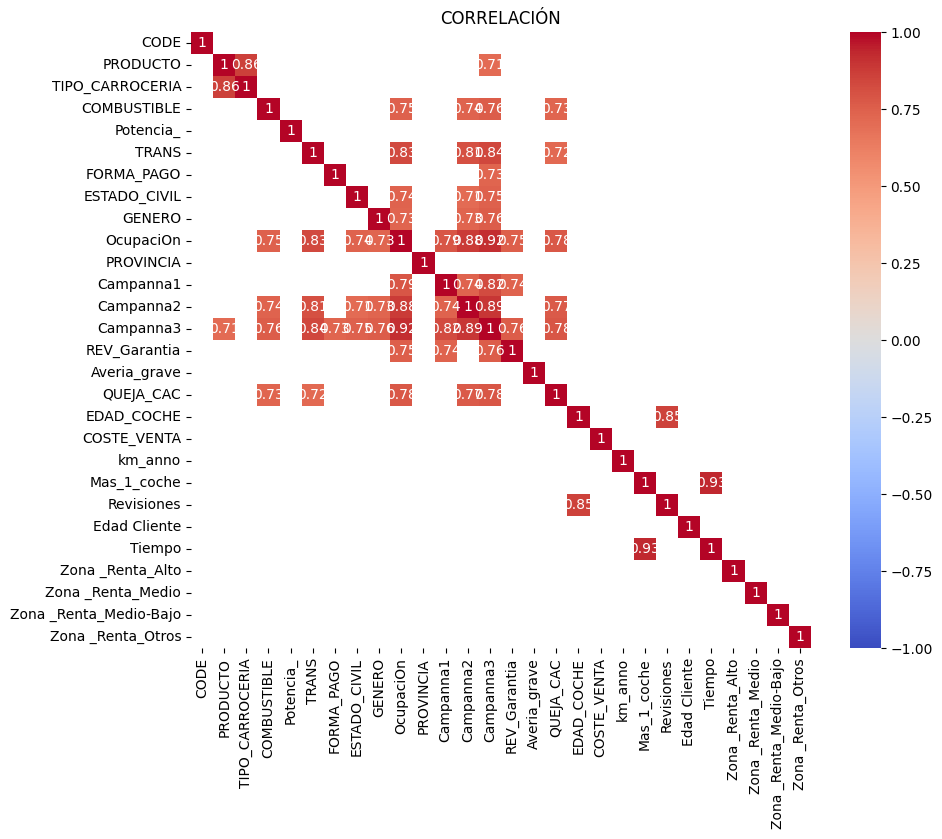

In [92]:
# Calcular la matriz de correlación
corr = df.corr()

# Aplicar un filtro para mostrar solo las correlaciones superiores a 0.6 o inferiores a -0.6
filtered_corr = corr[(corr > 0.7) | (corr < -0.7)]

# Crear el heatmap solo con las correlaciones filtradas
plt.figure(figsize=(10, 8))
plt.title('CORRELACIÓN')
sns.heatmap(filtered_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.show()

Vemos que hay mucha relación entre las campañas y las provincias

In [93]:
df = pd.read_csv('cars.csv', sep=';')

le = LabelEncoder()

for column in df.columns:
    if df[column].dtype == type(object) and column != 'PROVINCIA':
        df[column] = le.fit_transform(df[column])

In [117]:
# Filtrar el DataFrame
df_filtered = df[df['Mas_1_coche'] > 0]

# Agrupar los datos por 'PROVINCIA' o 'Campanna' y sumar las adquisiciones
grouped_data = df_filtered.groupby(['PROVINCIA', 'Mas_1_coche'])['Campanna1'].sum().reset_index()

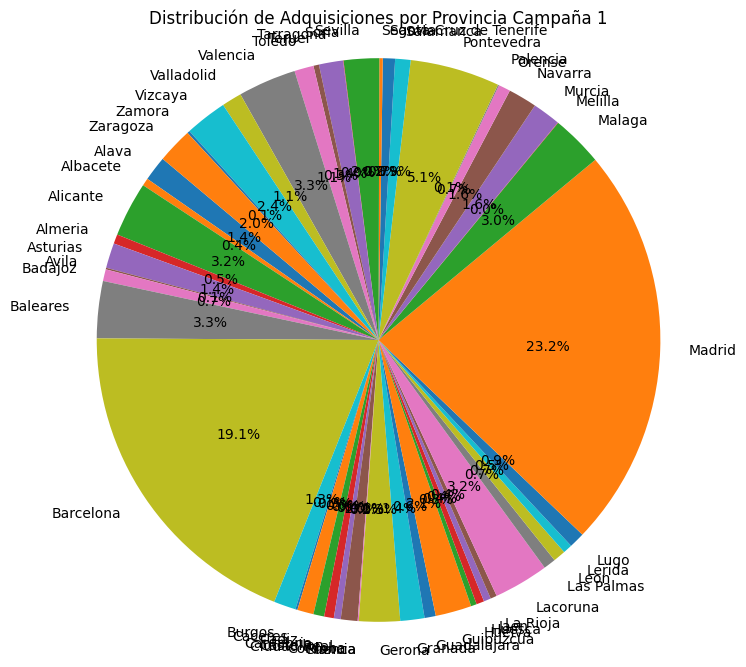

In [118]:
# Agrupar los datos por 'PROVINCIA' y sumar las adquisiciones
provincia_data = grouped_data.groupby('PROVINCIA')['Campanna1'].sum()

# Crear el gráfico de tarta
plt.figure(figsize=(8, 8))
plt.pie(provincia_data, labels=provincia_data.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribución de Adquisiciones por Provincia Campaña 1')
plt.axis('equal')  # Para asegurar que el gráfico sea circular
plt.show()


In [119]:
# Agrupar los datos por 'PROVINCIA' o 'Campanna' y sumar las adquisiciones
grouped_data = df_filtered.groupby(['PROVINCIA', 'Mas_1_coche'])['Campanna2'].sum().reset_index()

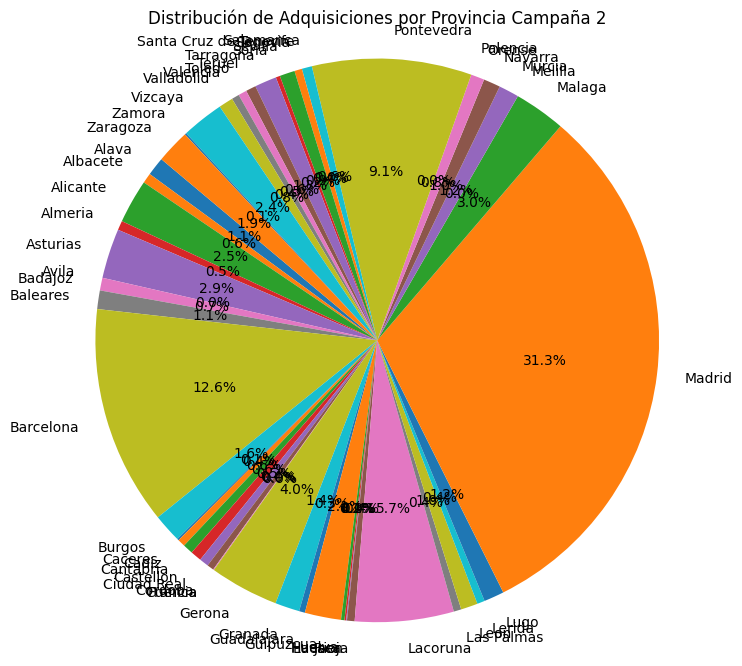

In [120]:
# Agrupar los datos por 'PROVINCIA' y sumar las adquisiciones
provincia_data = grouped_data.groupby('PROVINCIA')['Campanna2'].sum()

# Crear el gráfico de tarta
plt.figure(figsize=(8, 8))
plt.pie(provincia_data, labels=provincia_data.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribución de Adquisiciones por Provincia Campaña 2')
plt.axis('equal')  # Para asegurar que el gráfico sea circular
plt.show()


In [121]:
# Agrupar los datos por 'PROVINCIA' o 'Campanna' y sumar las adquisiciones
grouped_data = df_filtered.groupby(['PROVINCIA', 'Mas_1_coche'])['Campanna3'].sum().reset_index()

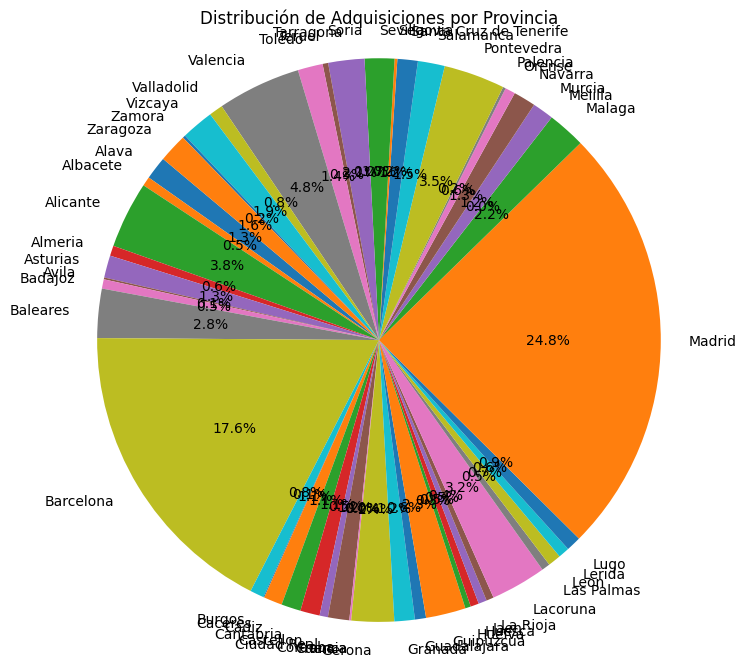

In [122]:
# Agrupar los datos por 'PROVINCIA' y sumar las adquisiciones
provincia_data = grouped_data.groupby('PROVINCIA')['Campanna3'].sum()

# Crear el gráfico de tarta
plt.figure(figsize=(8, 8))
plt.pie(provincia_data, labels=provincia_data.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribución de Adquisiciones por Provincia')
plt.axis('equal')  # Para asegurar que el gráfico sea circular
plt.show()

Es evidente que cuanta más población haya en un sitio, más probable es que te aquieran un coche desde allí.
Pero en proporción población-provincia/porcentaje de gente que adquiere un coche desde esa provincia, hay más porcentaje de gente que adquiera un segundo coche, que porcentaje de población de ese sitio.
(Madrid:14.28% población de españa / Madrid : 26.467% de los recompradores de coches son de madrid)